# Train and Evaluate Deep Learning with TensorFlow

In [27]:
import pandas as pd

penguins = pd.read_csv('data/penguins.csv').dropna()


penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

for i in range(1,3):
    penguins = penguins.append(penguins)

sample = penguins.sample(10)
sample

C:\Users\restu\AppData\Local\Temp\ipykernel_2996\3769260766.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
C:\Users\restu\AppData\Local\Temp\ipykernel_2996\3769260766.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
221,50.7,15.0,22.3,55.50,1
174,46.5,14.5,21.3,44.00,1
63,41.1,18.2,19.2,40.50,0
158,45.4,14.6,21.1,48.00,1
203,48.5,14.1,22.0,53.00,1
115,42.7,18.3,19.6,40.75,0
55,41.4,18.6,19.1,37.00,0
73,45.8,18.9,19.7,41.50,0
105,39.7,18.9,18.4,35.50,0
300,46.7,17.9,19.5,33.00,2


In [28]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 33.1 16.1 17.8 29.0 0 ] Adelie
[ 38.1 17.0 18.1 31.75 0 ] Adelie
[ 46.8 14.3 21.5 48.5 1 ] Gentoo
[ 48.2 14.3 21.0 46.0 1 ] Gentoo
[ 45.2 16.6 19.1 32.5 2 ] Chinstrap
[ 49.3 15.7 21.7 58.5 1 ] Gentoo
[ 44.5 14.7 21.4 48.5 1 ] Gentoo
[ 46.8 16.1 21.5 55.0 1 ] Gentoo
[ 37.9 18.6 19.3 29.25 0 ] Adelie
[ 43.5 18.1 20.2 34.0 2 ] Chinstrap


In [29]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
label = 'Species'

x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                   penguins[label].values,
                                                   test_size=0.30,
                                                   random_state=0)
print('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print('Sample of features and labels:')

for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


In [ ]:
pip install tensorflow

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers


tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.12.0
TensorFlow version: 2.12.0


### Data Understanding for TensorFlow

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


### Data Modeling Neural Network

In [13]:
hl = 10

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


### Data Training Model Neural Network

In [15]:
learning_rate = 0.0001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 3s 9ms/step - loss: 12.2682 - accuracy: 0.4493 - val_loss: 4.4084 - val_accuracy: 0.4234
Epoch 2/50
96/96 [==============================] - 0s 5ms/step - loss: 1.8245 - accuracy: 0.4984 - val_loss: 0.9350 - val_accuracy: 0.4891
Epoch 3/50
96/96 [==============================] - 0s 5ms/step - loss: 0.8874 - accuracy: 0.5319 - val_loss: 0.8751 - val_accuracy: 0.5864
Epoch 4/50
96/96 [==============================] - 0s 5ms/step - loss: 0.8541 - accuracy: 0.5549 - val_loss: 0.8408 - val_accuracy: 0.5499
Epoch 5/50
96/96 [==============================] - 0s 5ms/step - loss: 0.8272 - accuracy: 0.5444 - val_loss: 0.8206 - val_accuracy: 0.5401
Epoch 6/50
96/96 [==============================] - 1s 6ms/step - loss: 0.8078 - accuracy: 0.5287 - val_loss: 0.7998 - val_accuracy: 0.5596
Epoch 7/50
96/96 [==============================] - 0s 5ms/step - loss: 0.7878 - accuracy: 0.5559 - val_loss: 0.7782 - val_accuracy: 0.5353
Epoch 8/50
96/96 [=

### Review Training and Velidation Losses

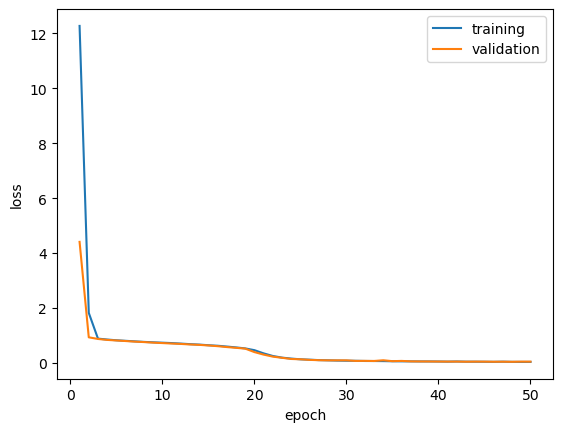

In [16]:
%matplotlib inline 
from matplotlib import pyplot as plt

epoch_nums = range(1, num_epochs+1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Wight and Bias Learned

In [18]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('-----------\nWeights:\n', weights, '\nBiases:\n', biases)

-----------
Weights:
 [[ 0.12949777  0.00701475 -0.10277726 -0.39718273  0.92586404 -0.25267598
  -0.6402239  -0.6399893  -0.09164275  0.3582015 ]
 [-0.5623158  -0.04528099  0.7612501  -0.28665704 -0.36178413 -0.514186
  -0.25783134  0.5933256  -0.57611334 -0.63780624]
 [-0.4413129  -0.45786786  0.16048676  0.1913498  -0.07995707 -0.6478267
  -0.35838425  0.48351586  0.03257608 -0.4051839 ]
 [-0.46712476 -0.59025156  0.20339453  0.7217742  -0.26960966 -0.32552737
   0.6124487  -0.24371922  0.20049682 -0.15896207]] 
Biases:
 [ 0.          0.          0.22669454 -0.33840686 -0.13050644  0.
  0.          0.         -0.09710623  0.        ]
-----------
Weights:
 [[ 2.2763836e-01 -3.4823805e-01  4.8719692e-01  8.1764221e-02
   2.2420943e-01  2.5256735e-01 -1.5305594e-01  3.8804400e-01
  -4.4991902e-01 -2.8747186e-01]
 [ 1.0642558e-01 -3.7990206e-01 -3.1259948e-01  1.8328822e-01
  -6.8363845e-02 -5.0628293e-01  3.0687439e-01 -8.6539984e-04
   1.1490107e-02 -4.0336192e-01]
 [ 5.8988243e-01  4

### Evaluate Model Performance

13/13 [==============================] - 0s 2ms/step


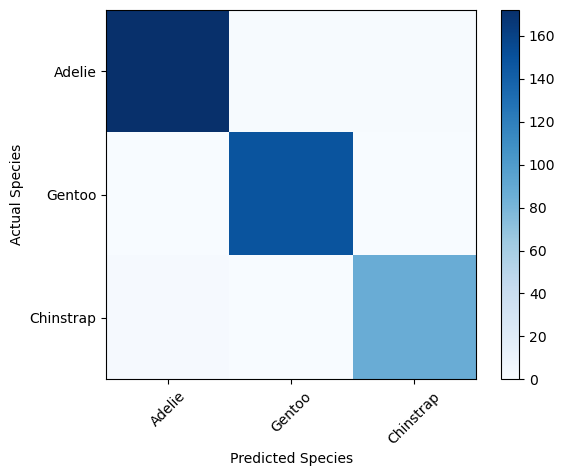

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

### Save Train Model

In [22]:
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model
print('Model Saved as', modelFileName)

Model Saved as models/penguin-classifier.h5


### Use Training Model 

In [24]:
model = models.load_model(modelFileName)

x_new = np.array([[50.4, 15.3, 10, 50]])
print('Name sample: {}'.format(x_new))

class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

Name sample: [[50.4 15.3 10.  50. ]]
1/1 [==============================] - 0s 102ms/step
Gentoo
